## Project: Wrangle and Analyze Data


## Table of Contents
- [Introduction](#intro)
- [Gather ](#gather)
- [Assess](#assess)
- [Quality](#quality)


<a id='intro'></a>
### Introduction

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

Goal of this project are wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. We will gather additional dataset, then assess and clean to acheive a better analyses and visualizations.

<a id='gather'></a>
### Gathering Data

To get started, let's import our libraries (pandas, Numpy, requests, tweepy, json, re and timeit).

In [1]:
import pandas as pd    # For database management
import numpy as np     # For numerical operations
import json            # For reading data from tweeter API
import seaborn as sns  # For plotting data easily
import re              # For regular expression search   
import tweepy          # To enable to communicate with Tweeter and use its API
from tweepy import OAuthHandler
import matplotlib.pyplot as plt

%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

sns.set()                       # Set seaborn style so plots are nice!

from timeit import default_timer as timer

# Tweeter account has been created.
# consumer and access key/token and secret were generated 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

#### 1. WeRateDogs Twitter archive Dataset

Goal: Need to check the data for the ratings, dog names and dog stages. 

We will need to assess and clean these columns if used them for analysis and visualization.

In [10]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

#### 1.1 Assess given dataset:
In the cells below, each column of each table from given twitter-archive-enhanced dataset is described. Assess each column for validity, missing or if meaningful to keep the records

In [3]:
df_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
df_enhanced.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Define Tweet Object based on Tweeter [link](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html): Tweets are the basic atomic building block of all things Twitter. Tweets are also known as “status updates.” The Tweet object has a long list of ‘root-level’ attributes, including fundamental attributes such as id, created_at, and text. Tweet objects are also the ‘parent’ object to several child objects. Tweet child objects include user, entities, and extended_entities. Tweets that are geo-tagged will have a place child object.

`Tweets` few basic column definitions:
- **created_at**: UTC time when this Tweet was created. 
- **id or tweet_id**: The integer representation of the unique identifier for this Tweet. [Tweet Object Id](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html) .
- **id_str**: The string representation of the unique identifier for this Tweet.
- **text**: The actual UTF-8 text of the status update. 
- **source**: Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value of web.
- **user**: The user who posted this Tweet. See User data dictionary for complete list of attributes from above link.
- **retweet_count**: Number of times this Tweet has been retweeted. 
- **favorite_count**: Nullable. Indicates approximately how many times this Tweet has been liked by Twitter users. 

In [11]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
print('The df_enhanced dataset has {} rows and {} columns'.format(df_enhanced.shape[0],df_enhanced.shape[1]))

The df_enhanced dataset has 2356 rows and 17 columns


#### 1.2. Clean
`df_enhanced: Missing data` The following columns have very limited number of record and will have no value for our analysis so we are droping columns:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id

`df_enhanced: data assumed to be irrelevant ` I beleive the following columns are not usefull so we are dropping those too
- retweeted_status_timestamp 
- source
- expanded_urls

In [13]:
# Now we are dropping the above 7 columns
df_enhanced.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
                  'retweeted_status_user_id','source','expanded_urls',\
                  'retweeted_status_timestamp'], inplace = True, axis = 1)

#### 1.3. Test

In [14]:
df_enhanced.info() # Test for deletion and remaining columns should be 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(7)
memory usage: 184.1+ KB


In [9]:
# Unique values for each column
df_enhanced.nunique()

tweet_id              2356
timestamp             2356
text                  2356
rating_numerator        40
rating_denominator      18
name                   957
doggo                    2
floofer                  2
pupper                   2
puppo                    2
dtype: int64

In [10]:
# Let's test for the number of duplicates in the dataset
df_enhanced.duplicated().sum()

0

- There is no duplicated records.

In [11]:
# Column names to check if rename is needed.
df_enhanced.columns 

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

- All column names are good and no rename needed

#### 1.4 Assess more...

In [15]:
# let's access the data 'name', 'doggo', 'floofer', 'pupper' and 'puppo' only to include with valid values.
count_name = df_enhanced.query('name != "None"').name.count()
count_doggo = (df_enhanced['doggo']=='doggo').sum()
count_floofer = (df_enhanced['floofer']=='floofer').sum()
count_pupper = (df_enhanced['pupper']=='pupper').sum()
count_puppo = (df_enhanced['puppo']=='puppo').sum()

dic_count = {
    "count_name":count_name,
    "count_doggo":count_doggo,
    "count_floofer":count_floofer,
    "count_pupper":count_pupper,
    "count_puppo":count_puppo,
}
dic_count

{'count_name': 1611,
 'count_doggo': 97,
 'count_floofer': 10,
 'count_pupper': 257,
 'count_puppo': 30}

`Missing data continue` The following fields has very small number of record compared to the size of the dataset and will contribute no value for our analysis but we will keep in case if we able to extract more data from other data extracted from API, will come in the next data gathering:
- 'dogo'
- 'floofer'
- 'pupper'
- 'puppo'

'name' will not give us any meaningful result, eventhough we show resonably good number comparing to other datasets  

Let's access the two rating values: "rating_numerator" and "rating_denominator"

In [16]:
df_enhanced[["rating_numerator","rating_denominator"]].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


#### 2. Quality of dataset
Exploring the two quantitative data fields:

`rating_denominator:` 
- has at least one with 0 value, that will cause undifiend if we attempt to find ratios
- some values are greater or less than 10, none standard or incosistent from other data
- max value of 170 shows extrem or potentially data entry error

`rating_numerator:`
- has a max value of 1776 which is extrem or potentially data entry error and this caused the standard devation 45.

In [17]:
# let's inspect records where rating_denominator is zero  
df_enhanced.query('rating_denominator==0')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None,None,None,None,None


In [15]:
df_enhanced.query('rating_denominator==0').text[313] #reading text to see the cause of the data quality issue

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

Eventhough this is just one record and may not worth fixing I want to show the methods used to resolve data quality issues. note that the first occurance of the number/number search result incorrectly captured 960/00 instead of 13/10 as shown to the end of the text.

In [18]:
df_enhanced.loc[313].rating_numerator = 13
df_enhanced.loc[313].rating_denominator = 10
df_enhanced.rating_numerator[313] #this will fix the data.

960

reviewing on the text and other fields where rating_denominator is zero it seems that this a potential record to be deleted. We may come back on this if we can pull record to recover missing data for specific tweet_id of value 835246439529840640 

In [17]:
# let's see how many of 'rating_denominator' are less than 10
df_enhanced.query('rating_denominator < 10').rating_denominator.count()

3

In [18]:
#We found two records that shows 'rating_denominator' values less than 10
df_enhanced.query('rating_denominator < 10')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,1,2,an,None,None,None,None


In [19]:
#We found two records that shows 'rating_denominator' values less than 10
df_enhanced.query('rating_denominator < 10').text[516]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [20]:
df_enhanced.query('rating_denominator < 10').text[2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

- Let's drop row 516 as it doesn't show any relevant info about the ratings and dog stages
- Row 2335 we fix with correct values

In [21]:
df_enhanced[516:517]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None


In [22]:
df_enhanced = df_enhanced.drop(df_enhanced.index[516])

In [23]:
df_enhanced.rating_numerator[2335] = 9
df_enhanced.rating_denominator[2335]=10

Let us test if we have values < 10 or row 516 if deleted

In [24]:
df_enhanced.query('rating_denominator < 10')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None,None,None,None,None


In [25]:
# let's see how many of 'rating_denominator' are greater than 10
df_enhanced.query('rating_denominator > 10').rating_denominator.count()

20

There are 20 records where rating_denominator are greater than 10, we will investigate on those record

In [26]:
#let's inspect the record for those 20 
df_enhanced.query('rating_denominator > 10')[['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
342,832088576586297345,11,15
433,820690176645140481,84,70
784,775096608509886464,9,11
902,758467244762497024,165,150
1068,740373189193256964,9,11
1120,731156023742988288,204,170
1165,722974582966214656,4,20
1202,716439118184652801,50,50
1228,713900603437621249,99,90
1254,710658690886586372,80,80


Those seems entered intentionally but it may give similar rate if we use ratios
We may need to dig in to the tweet data if we able to extract and verify those values are correctly
extracted on the original enhanced file.
If correct then instead of deleting the records we may able to replace by normalizing around 10. 
replace rating_denominator by  (rating_denominator / rating_denominator ) * 10 and 
replace rating_numerator by (rating_numerator / rating_denominator) * 10

Note that max value of 170 rating_denominator could be corrected similar to above.

#### Outliers
- let's inspect where rating_numerator in is excessively high such as 1776

In [27]:
df_enhanced.query('rating_numerator == 1776')[['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
979,749981277374128128,1776,10


In [28]:
df_enhanced.text[979]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

Noting that the rating_numerator of 1776 has a value of 10 for rating_denominator, may need to drop the record.

In [29]:
# Checking for those with rating_numerator greater than 20
df_enhanced.query('rating_numerator > 20')[['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
188,855862651834028034,420,10
189,855860136149123072,666,10
290,838150277551247360,182,10
313,835246439529840640,960,0
340,832215909146226688,75,10
433,820690176645140481,84,70
695,786709082849828864,75,10
763,778027034220126208,27,10
902,758467244762497024,165,150
979,749981277374128128,1776,10


The above shows similar record as we inspected previously for rating_denominator, which we may able to correct either
by filling normalized value or simply using ratios, before we do that let's get other datasets and access through for final determination

##### 2. Additional Dataset via the Twitter API

Let's find retweet count and favorite count.
This additional data can be gathered using Twitter's API since we know tweet_id from WeRateDogs Twitter archive.

In [30]:
tweet_ids = df_enhanced.tweet_id.values
len(tweet_ids)

2355

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

len(fails_dict)

All success JSON records were written to a file and it took 1930 sec. to complete with 16 failed and as shown in fails_dict

Read json files row by row from  'tweet_json.txt' and store in temporary list 'data' then place it in dataframe.

In [31]:
data = []
with open('tweet_json.txt','r') as f:
    for line in f:
        data.append(json.loads(line))
    
df = pd.DataFrame(data) 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2340 non-null object
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null object
id                               2340 non-null int64
id_str                           2340 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [33]:
df.lang.value_counts() # assess if language is important data to keep

en     2322
und       7
in        3
nl        3
tl        1
ro        1
et        1
eu        1
es        1
Name: lang, dtype: int64

In [34]:
df.retweeted.value_counts()                     

False    2340
Name: retweeted, dtype: int64

In [35]:
df.id[9] # tweet_id

890240255349198849

In [36]:
df = df[['id','full_text','retweet_count','favorite_count']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
id                2340 non-null int64
full_text         2340 non-null object
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.2+ KB


In [37]:
#Since we identify tweet_id as unique identifier for the tweets we going to rename id to tweet_id
#so that when we merge two tables we can use the same column for joining.
df = df.rename(columns={'id':'tweet_id','full_text':'full_text','retweet_count':'retweet_count','favorite_count':'favorite_count'})
df.head(2)

,tweet_id,full_text,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8288,37949
1,892177421306343426,This is Tilly. She's just checking pup on you....,6121,32584


In [38]:
#Let's see to find where we show rating_numerator of 1776
df.query('tweet_id == 749981277374128128')

,tweet_id,full_text,retweet_count,favorite_count
964,749981277374128128,This is Atticus. He's quite simply America af....,2623,5364


In [39]:
#Let' investigate for full_text
df.query('tweet_id == 749981277374128128').full_text.index

Int64Index([964], dtype='int64')

In [40]:
df.query('tweet_id == 749981277374128128').full_text[964]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

Since this value is errorous data entry and only one record we prefer to drop from dataframe

In [41]:
df.full_text[9]

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A'

In [42]:
df.full_text.index

RangeIndex(start=0, stop=2340, step=1)

In [43]:
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [44]:
df.full_text.loc[2]

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

In [45]:
df[df['tweet_id'] == 891815181378084864 ].index[0]

2

In [46]:
# access rating data for numerator and denominator

df.loc[:,'ds_rating'] = None

counter = 0
for index, row in df.iterrows():
    df.loc[index,'ds_rating'] = re.findall('[0-9]+/[0-9]+',row['full_text'])[0]
    counter += 1
    #if counter == 10: break #used for testing 

In [47]:
df.head(2)

,tweet_id,full_text,retweet_count,favorite_count,ds_rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8288,37949,13/10
1,892177421306343426,This is Tilly. She's just checking pup on you....,6121,32584,13/10


In [48]:
df.ds_rating.value_counts() # inspect the extreme cases 

12/10      554
11/10      463
10/10      459
13/10      345
9/10       156
8/10       102
7/10        53
14/10       51
5/10        37
6/10        32
3/10        19
4/10        15
2/10         9
1/10         8
0/10         2
75/10        2
420/10       2
4/20         2
15/10        2
960/00       1
27/10        1
666/10       1
007/10       1
11/15        1
9/11         1
165/150      1
80/80        1
182/10       1
144/120      1
204/170      1
1776/10      1
24/7         1
45/50        1
1/2          1
17/10        1
88/80        1
7/11         1
44/40        1
143/130      1
20/16        1
99/90        1
84/70        1
121/110      1
60/50        1
26/10        1
50/50        1
Name: ds_rating, dtype: int64

In [49]:
df.ds_rating.str.split('/', expand=True).head() # use [0] or [1] to get individual ratings for 

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10


In [50]:
df[['ds_numerator','ds_denominator']] = df.ds_rating.str.split('/', expand=True)
df['ds_numerator'] = df['ds_numerator'].astype(int)
df['ds_denominator'] = df['ds_denominator'].astype(int)

In [51]:
df.head()

,tweet_id,full_text,retweet_count,favorite_count,ds_rating,ds_numerator,ds_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8288,37949,13/10,13,10
1,892177421306343426,This is Tilly. She's just checking pup on you....,6121,32584,13/10,13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4054,24533,12/10,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8426,41291,13/10,13,10
4,891327558926688256,This is Franklin. He would like you to stop ca...,9130,39478,12/10,12,10


In [52]:
df.describe()

,tweet_id,retweet_count,favorite_count,ds_numerator,ds_denominator
count,2.340000e+03,2340.000000,2340.000000,2340.000000,2340.00000
mean,7.422176e+17,2918.644017,7942.288889,13.132051,10.45812
std,6.832564e+16,4917.243259,12302.265135,46.033086,6.76816
min,6.660209e+17,0.000000,0.000000,0.000000,0.00000
25%,6.783394e+17,584.750000,1370.500000,10.000000,10.00000
50%,7.186224e+17,1361.000000,3452.500000,11.000000,10.00000
75%,7.986954e+17,3399.750000,9721.000000,12.000000,10.00000
max,8.924206e+17,83340.000000,163874.000000,1776.000000,170.00000


Below we are going to use regex to search records from full_text that matchs for the name, and dog stages that are retrieved from API generated dataframe:
- to see if more records can be found
- to validate the accuracy of the data
- then  merge the two table together
- attempt to see if there is any relation of rating with gender (he or she)

In [53]:
import re
df_copy = df.copy()

#Initialize counters
count = 0
count_noName = 0
count_notype = 0
count_nogender = 0
for myindex in df.full_text.index:
    mytext = df.full_text[myindex]
    # Name search:
    ds_name = pd.Series(re.findall('^This is ([A-Z][a-z]+)|^Meet ([A-Z][a-z]+)',mytext))
    if ds_name.empty==True:
        #print(myindex,df_2_id,"None", myindex == df.index[myindex])
        df_copy.loc[myindex,'ds_name'] = 'None'
        count_noName += 1
    else: 
        df_copy.loc[myindex,'ds_name'] =  ''.join(ds_name[0]) # used join to convert tuple to string format
    
    # Dog stages search:
    mytext = mytext.lower() #convert all caps to small letters to make sure search will find all.
    ds_dog = pd.Series(re.findall(r'((\bdoggo\b)|(\bfloofer\b)|(\bpupper\b)|(\bpuppo\b))',mytext))
    if ds_dog.empty==True:
        df_copy.loc[myindex,'ds_dog'] = 'None'
        count_notype += 1
    else: 
        df_copy.loc[myindex,'ds_dog'] =  ds_dog[0][0] # grab only the first element of tuple 
        
    # Gender search: words he or him or she or her are the best indicator for gender 
    ds_gender = pd.Series(re.findall(r'(((\bhe\b)|(\bhim\b))|((\bshe\b)|(\bher\b)))',mytext))
    if ds_gender.empty==True:
        df_copy.loc[myindex,'ds_gender'] = 'None'
        count_nogender += 1
    else: 
        # grab only the first element of tuple 
        df_copy.loc[myindex,'ds_gender'] =  ds_gender[0][0]
    count += 1

print('Count of No name: {} Count with dog name: {}'.format(count_noName,count - count_noName))
print('Count of No dog type: {}  Count with dog type: {}'.format(count_notype,count - count_notype))
print('Count of No dog gender: {} Count with dog gender: {} '.format(count_nogender,count - count_nogender))

Count of No name: 1053 Count with dog name: 1287
Count of No dog type: 1963  Count with dog type: 377
Count of No dog gender: 857 Count with dog gender: 1483 


In [54]:
df_copy[['tweet_id','full_text','retweet_count','favorite_count','ds_numerator','ds_denominator','ds_name','ds_dog','ds_gender']]

,tweet_id,full_text,retweet_count,favorite_count,ds_numerator,ds_denominator,ds_name,ds_dog,ds_gender
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8288,37949,13,10,Phineas,None,he
1,892177421306343426,This is Tilly. She's just checking pup on you....,6121,32584,13,10,Tilly,None,she
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4054,24533,12,10,Archie,None,he
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8426,41291,13,10,Darla,None,she
4,891327558926688256,This is Franklin. He would like you to stop ca...,9130,39478,12,10,Franklin,None,he
5,891087950875897856,Here we have a majestic great white breaching ...,3039,19841,13,10,None,None,None
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,2010,11597,13,10,Jax,None,he
7,890729181411237888,When you watch your owner call another dog a g...,18387,64022,13,10,None,None,None
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,4176,27248,13,10,Zoey,None,she
9,890240255349198849,This is Cassie. She is a college pup. Studying...,7190,31263,14,10,Cassie,doggo,she


In [55]:
df_copy.ds_gender.replace('him','Male',inplace=True)
df_copy.ds_gender.replace('her','Female',inplace=True)
df_copy.ds_gender.replace('he','Male',inplace=True)
df_copy.ds_gender.replace('she','Female',inplace=True)

In [56]:
df_copy[['tweet_id','full_text','ds_dog','ds_gender']].nunique()

tweet_id     2340
full_text    2340
ds_dog          5
ds_gender       3
dtype: int64

In [57]:
df_copy.head()

,tweet_id,full_text,retweet_count,favorite_count,ds_rating,ds_numerator,ds_denominator,ds_name,ds_dog,ds_gender
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8288,37949,13/10,13,10,Phineas,None,Male
1,892177421306343426,This is Tilly. She's just checking pup on you....,6121,32584,13/10,13,10,Tilly,None,Female
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4054,24533,12/10,12,10,Archie,None,Male
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8426,41291,13/10,13,10,Darla,None,Female
4,891327558926688256,This is Franklin. He would like you to stop ca...,9130,39478,12/10,12,10,Franklin,None,Male


In [58]:
df_copy.loc[ : ,'ds_rate'] = df_copy.ds_numerator.values/(df_copy.ds_denominator.values + 0.0001)
df_copy.loc[ : ,'ds_rate'].apply(lambda x: round(x,2))

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
7       1.3
8       1.3
9       1.4
10      1.3
11      1.3
12      1.3
13      1.2
14      1.3
15      1.3
16      1.2
17      1.3
18      1.3
19      1.2
20      1.3
21      1.4
22      1.3
23      1.3
24      1.2
25      1.3
26      1.3
27      1.3
28      1.2
29      1.2
       ... 
2310    0.2
2311    0.7
2312    0.9
2313    1.1
2314    0.6
2315    0.8
2316    1.0
2317    0.9
2318    0.3
2319    0.5
2320    1.1
2321    1.0
2322    0.1
2323    1.1
2324    0.8
2325    0.9
2326    0.6
2327    1.0
2328    0.9
2329    1.0
2330    0.8
2331    0.9
2332    1.0
2333    0.2
2334    1.0
2335    0.5
2336    0.6
2337    0.9
2338    0.7
2339    0.8
Name: ds_rate, Length: 2340, dtype: float64

In [59]:
# Let's keep only column that will help in analysing and visualization
# eventhough I attempted to re-create the name field I don't beleive that will have any value so I am dropping it here.
df_copy = df_copy[['tweet_id','full_text','retweet_count','favorite_count','ds_rate','ds_numerator','ds_denominator','ds_dog','ds_gender']]
df_copy.head(2)

,tweet_id,full_text,retweet_count,favorite_count,ds_rate,ds_numerator,ds_denominator,ds_dog,ds_gender
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8288,37949,1.299987,13,10,None,Male
1,892177421306343426,This is Tilly. She's just checking pup on you....,6121,32584,1.299987,13,10,None,Female


In [60]:
df_copy.describe()

,tweet_id,retweet_count,favorite_count,ds_rate,ds_numerator,ds_denominator
count,2.340000e+03,2340.000000,2340.000000,2.340000e+03,2340.000000,2340.00000
mean,7.422176e+17,2918.644017,7942.288889,4.103786e+03,13.132051,10.45812
std,6.832564e+16,4917.243259,12302.265135,1.984556e+05,46.033086,6.76816
min,6.660209e+17,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,6.783394e+17,584.750000,1370.500000,9.999900e-01,10.000000,10.00000
50%,7.186224e+17,1361.000000,3452.500000,1.099989e+00,11.000000,10.00000
75%,7.986954e+17,3399.750000,9721.000000,1.199988e+00,12.000000,10.00000
max,8.924206e+17,83340.000000,163874.000000,9.600000e+06,1776.000000,170.00000


#### Joining tables
Let' start merging the two tables but we need to make sure we have the same reference column existed in both tables

In [61]:
df_enhanced = df_enhanced[['tweet_id','rating_numerator','rating_denominator','doggo','floofer','pupper','puppo']]
df_enhanced.head(2)

,tweet_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,13,10,None,None,None,None
1,892177421306343426,13,10,None,None,None,None


In [62]:
df_enhanced.columns.values

array(['tweet_id', 'rating_numerator', 'rating_denominator', 'doggo',
       'floofer', 'pupper', 'puppo'], dtype=object)

In [63]:
df_copy.columns.values

array(['tweet_id', 'full_text', 'retweet_count', 'favorite_count',
       'ds_rate', 'ds_numerator', 'ds_denominator', 'ds_dog', 'ds_gender'], dtype=object)

In [64]:
df_clean = pd.merge(df_copy,df_enhanced, on='tweet_id')

In [65]:
df_clean.iloc[:,2:5]

,retweet_count,favorite_count,ds_rate
0,8288,37949,1.299987
1,6121,32584,1.299987
2,4054,24533,1.199988
3,8426,41291,1.299987
4,9130,39478,1.199988
5,3039,19841,1.299987
6,2010,11597,1.299987
7,18387,64022,1.299987
8,4176,27248,1.299987
9,7190,31263,1.399986


In [66]:
df_clean[(df_clean['doggo'] == "doggo") & (df_clean['ds_dog'] != "doggo")]

,tweet_id,full_text,retweet_count,favorite_count,ds_rate,ds_numerator,ds_denominator,ds_dog,ds_gender,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
185,855851453814013952,Here's a puppo participating in the #ScienceMa...,18198,46060,1.299987,13,10,puppo,Female,13,10,doggo,None,None,puppo
450,817777686764523521,"This is Dido. She's playing the lead role in ""...",2910,11357,1.299987,13,10,pupper,Female,13,10,doggo,None,pupper,None
519,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,2401,9323,1.199988,12,10,pupper,None,12,10,doggo,None,pupper,None
720,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",2771,7582,1.199988,12,10,pupper,None,12,10,doggo,None,pupper,None
807,770093767776997377,RT @dog_rates: This is just downright precious...,3279,0,1.199988,12,10,pupper,None,12,10,doggo,None,pupper,None
1047,741067306818797568,This is just downright precious af. 12/10 for ...,3279,9870,1.199988,12,10,pupper,None,12,10,doggo,None,pupper,None


In [67]:
df_clean[(df_clean['doggo'] == "doggo") & (df_clean['ds_dog'] != "doggo")].full_text[185]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [68]:
df_clean[(df_clean['doggo'] == "doggo") & (df_clean['ds_dog'] != "doggo")].full_text[450]

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [69]:
df_clean[(df_clean['doggo'] == "doggo") & (df_clean['ds_dog'] != "doggo")].full_text[519]

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

Those I extracted from API only pick one type of dog but for tweet_id 808106460588765185 we see two dogs: pupper and doggo

In [70]:
df_clean.head()

,tweet_id,full_text,retweet_count,favorite_count,ds_rate,ds_numerator,ds_denominator,ds_dog,ds_gender,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8288,37949,1.299987,13,10,None,Male,13,10,None,None,None,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,6121,32584,1.299987,13,10,None,Female,13,10,None,None,None,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4054,24533,1.199988,12,10,None,Male,12,10,None,None,None,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8426,41291,1.299987,13,10,None,Female,13,10,None,None,None,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,9130,39478,1.199988,12,10,None,Male,12,10,None,None,None,None


I kept repeated columns from two tables on purpose, just to make sure the original data given and the API extract show consistency 

In [71]:
(df_clean.ds_numerator == df_clean.rating_numerator).value_counts()

True     2338
False       1
dtype: int64

In [72]:
(df_clean.ds_denominator == df_clean.rating_denominator).value_counts()

True     2338
False       1
dtype: int64

Here we show only two records from rating columns that are not matching out of 2339 for that reason it is safe to delete 'ds_numerator' and 'ds_denominator' columns that I created from API dataset.

In [73]:
df_clean.drop(['ds_numerator','ds_denominator'],axis = 1, inplace=True)

In [74]:
df_clean[df_clean.rating_numerator == 1776]

,tweet_id,full_text,retweet_count,favorite_count,ds_rate,ds_dog,ds_gender,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
963,749981277374128128,This is Atticus. He's quite simply America af....,2623,5364,177.598224,None,Male,1776,10,None,None,None,None


Since this is just one record I am droping it, I could also repace with the average values so that the other record retweet and favorite count could be used

In [75]:
df_clean.drop([963],inplace=True)

In [76]:
df_clean.describe()

,tweet_id,retweet_count,favorite_count,ds_rate,rating_numerator,rating_denominator
count,2.338000e+03,2338.000000,2338.000000,2.338000e+03,2338.000000,2338.000000
mean,7.421849e+17,2919.350299,7944.361420,4.107219e+03,12.376818,10.463216
std,6.833987e+16,4919.263113,12307.323038,1.985404e+05,28.114025,6.768415
min,6.660209e+17,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,6.783361e+17,584.250000,1369.500000,9.999900e-01,10.000000,10.000000
50%,7.185770e+17,1357.000000,3444.000000,1.099989e+00,11.000000,10.000000
75%,7.986926e+17,3401.250000,9721.000000,1.199988e+00,12.000000,10.000000
max,8.924206e+17,83340.000000,163874.000000,9.600000e+06,960.000000,170.000000


In [77]:
df_clean[df_clean.rating_numerator == 666]

,tweet_id,full_text,retweet_count,favorite_count,ds_rate,ds_dog,ds_gender,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
183,855860136149123072,@s8n You tried very hard to portray this good ...,1057,5099,66.599334,None,None,666,10,None,None,None,None


In [78]:
df_clean.drop([183],inplace=True) #another outlier 

In [79]:
df_clean.describe()

,tweet_id,retweet_count,favorite_count,ds_rate,rating_numerator,rating_denominator
count,2.337000e+03,2337.000000,2337.000000,2.337000e+03,2337.000000,2337.000000
mean,7.421362e+17,2920.147197,7945.578947,4.108948e+03,12.097133,10.463415
std,6.831401e+16,4920.164979,12309.816197,1.985829e+05,24.653028,6.769857
min,6.660209e+17,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,6.783345e+17,584.000000,1369.000000,9.999900e-01,10.000000,10.000000
50%,7.185406e+17,1357.000000,3442.000000,1.099989e+00,11.000000,10.000000
75%,7.986868e+17,3402.000000,9721.000000,1.199988e+00,12.000000,10.000000
max,8.924206e+17,83340.000000,163874.000000,9.600000e+06,960.000000,170.000000


In [80]:
(df_clean.ds_rate > 2).value_counts()

False    2329
True        8
Name: ds_rate, dtype: int64

In [81]:
df_clean = df_clean[df_clean['ds_rate'] < 2] # remove all rating greater or equal to 2

In [82]:
df_clean.describe()

,tweet_id,retweet_count,favorite_count,ds_rate,rating_numerator,rating_denominator
count,2.329000e+03,2329.000000,2329.000000,2329.000000,2329.000000,2329.00000
mean,7.419901e+17,2919.458137,7948.264921,1.068318,11.200515,10.46930
std,6.827058e+16,4924.504872,12319.642909,0.219333,8.010875,6.77796
min,6.660209e+17,0.000000,0.000000,0.000000,0.000000,10.00000
25%,6.782786e+17,586.000000,1369.000000,0.999990,10.000000,10.00000
50%,7.184547e+17,1357.000000,3446.000000,1.099989,11.000000,10.00000
75%,7.986731e+17,3399.000000,9721.000000,1.199988,12.000000,10.00000
max,8.924206e+17,83340.000000,163874.000000,1.699983,204.000000,170.00000


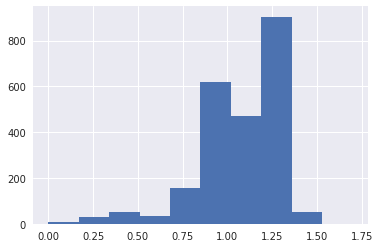

In [83]:
df_clean.ds_rate.hist()

In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2338
Data columns (total 13 columns):
tweet_id              2329 non-null int64
full_text             2329 non-null object
retweet_count         2329 non-null int64
favorite_count        2329 non-null int64
ds_rate               2329 non-null float64
ds_dog                2329 non-null object
ds_gender             2329 non-null object
rating_numerator      2329 non-null int64
rating_denominator    2329 non-null int64
doggo                 2329 non-null object
floofer               2329 non-null object
pupper                2329 non-null object
puppo                 2329 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 334.7+ KB


In [86]:
df_male = df_clean[df_clean['ds_gender'] == "Male"]
df_male.head(2)

,tweet_id,full_text,retweet_count,favorite_count,ds_rate,ds_dog,ds_gender,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8288,37949,1.299987,None,Male,13,10,None,None,None,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4054,24533,1.199988,None,Male,12,10,None,None,None,None


In [87]:
df_female = df_clean[df_clean['ds_gender'] == "Female"]
df_female.head(2)

,tweet_id,full_text,retweet_count,favorite_count,ds_rate,ds_dog,ds_gender,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
1,892177421306343426,This is Tilly. She's just checking pup on you....,6121,32584,1.299987,None,Female,13,10,None,None,None,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8426,41291,1.299987,None,Female,13,10,None,None,None,None


In [88]:
df_female.describe()

,tweet_id,retweet_count,favorite_count,ds_rate,rating_numerator,rating_denominator
count,3.840000e+02,384.000000,384.000000,384.000000,384.000000,384.000000
mean,7.591431e+17,3268.833333,9711.109375,1.123994,11.528646,10.263021
std,6.901626e+16,3862.119388,12372.626730,0.159535,5.822816,5.103226
min,6.664473e+17,20.000000,0.000000,0.199998,2.000000,10.000000
25%,6.912262e+17,862.750000,2053.250000,0.999990,10.000000,10.000000
50%,7.529721e+17,1896.000000,4370.500000,1.099994,11.500000,10.000000
75%,8.191586e+17,4192.000000,12761.500000,1.199988,12.000000,10.000000
max,8.921774e+17,26013.000000,81760.000000,1.399986,121.000000,110.000000


In [89]:
df_male.describe()

,tweet_id,retweet_count,favorite_count,ds_rate,rating_numerator,rating_denominator
count,1.094000e+03,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,7.461719e+17,2895.684644,8246.190128,1.061814,10.655393,10.037477
std,6.829985e+16,4431.865132,11512.009312,0.202568,2.348635,1.209698
min,6.660442e+17,32.000000,0.000000,0.099999,1.000000,10.000000
25%,6.810177e+17,700.000000,1710.500000,0.999990,10.000000,10.000000
50%,7.303850e+17,1584.000000,4030.000000,1.099989,11.000000,10.000000
75%,8.044603e+17,3451.000000,10840.250000,1.199988,12.000000,10.000000
max,8.924206e+17,60774.000000,126699.000000,1.399986,50.000000,50.000000


In [90]:
df_clean.retweet_count.max(),df_clean.favorite_count.max()

(83340, 163874)

In [91]:
df_clean[df_clean['ds_dog'] != "None"]['ds_dog']

9         doggo
12        puppo
14        puppo
28       pupper
42        doggo
45      floofer
48       pupper
55       pupper
77       pupper
81       pupper
91       pupper
93        puppo
95       pupper
96       pupper
97        doggo
104      pupper
105       doggo
107       doggo
117       doggo
125       puppo
130      pupper
132      pupper
162       puppo
166       doggo
185       puppo
193      pupper
194       doggo
205       doggo
214      pupper
216      pupper
         ...   
1858     pupper
1863     pupper
1872     pupper
1880     pupper
1886     pupper
1890     pupper
1898     pupper
1904     pupper
1913     pupper
1919     pupper
1920     pupper
1928     pupper
1931     pupper
1937     pupper
1939     pupper
1943     pupper
1950     pupper
1953     pupper
1957     pupper
1960     pupper
1963     pupper
1964     pupper
1968     pupper
1974     pupper
1975     pupper
1978     pupper
1985     pupper
1992     pupper
1998     pupper
2000     pupper
Name: ds_dog, Length: 37

In [92]:
df_clean[df_clean['ds_gender'] != "None"]['ds_gender'].value_counts()

Male      1094
Female     384
Name: ds_gender, dtype: int64

In [93]:
df_clean[df_clean['ds_dog'] != "None"]['ds_dog'].value_counts()

pupper     248
doggo       90
puppo       29
floofer      9
Name: ds_dog, dtype: int64

In [94]:
#sns.countplot(x=ds_dog, data = df_clean)

In [102]:
df_clean.loc[: ,'ds_favorite_rate'] = df_clean.favorite_count.values/df_clean.favorite_count.max()
#df_clean.loc[: ,'ds_fav_rate'].apply(lambda x: round(x,2))
df_clean.loc[: ,'ds_retweet_rate'] = df_clean.retweet_count.values/df_clean.retweet_count.max()
df_clean

,tweet_id,full_text,retweet_count,favorite_count,ds_rate,ds_dog,ds_gender,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,ds_fav_rate,ds_favorite_rate,ds_retweet_rate
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8288,37949,1.299987,None,Male,13,10,None,None,None,None,0.231574,0.231574,0.099448
1,892177421306343426,This is Tilly. She's just checking pup on you....,6121,32584,1.299987,None,Female,13,10,None,None,None,None,0.198836,0.198836,0.073446
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4054,24533,1.199988,None,Male,12,10,None,None,None,None,0.149706,0.149706,0.048644
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8426,41291,1.299987,None,Female,13,10,None,None,None,None,0.251968,0.251968,0.101104
4,891327558926688256,This is Franklin. He would like you to stop ca...,9130,39478,1.199988,None,Male,12,10,None,None,None,None,0.240905,0.240905,0.109551
5,891087950875897856,Here we have a majestic great white breaching ...,3039,19841,1.299987,None,None,13,10,None,None,None,None,0.121075,0.121075,0.036465
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,2010,11597,1.299987,None,Male,13,10,None,None,None,None,0.070768,0.070768,0.024118
7,890729181411237888,When you watch your owner call another dog a g...,18387,64022,1.299987,None,None,13,10,None,None,None,None,0.390678,0.390678,0.220626
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,4176,27248,1.299987,None,Female,13,10,None,None,None,None,0.166274,0.166274,0.050108
9,890240255349198849,This is Cassie. She is a college pup. Studying...,7190,31263,1.399986,doggo,Female,14,10,doggo,None,None,None,0.190775,0.190775,0.086273


In [103]:
df_clean.describe()

,tweet_id,retweet_count,favorite_count,ds_rate,rating_numerator,rating_denominator,ds_fav_rate,ds_favorite_rate,ds_retweet_rate
count,2.329000e+03,2329.000000,2329.000000,2329.000000,2329.000000,2329.00000,2329.000000,2329.000000,2329.000000
mean,7.419901e+17,2919.458137,7948.264921,1.068318,11.200515,10.46930,0.048502,0.048502,0.035031
std,6.827058e+16,4924.504872,12319.642909,0.219333,8.010875,6.77796,0.075178,0.075178,0.059089
min,6.660209e+17,0.000000,0.000000,0.000000,0.000000,10.00000,0.000000,0.000000,0.000000
25%,6.782786e+17,586.000000,1369.000000,0.999990,10.000000,10.00000,0.008354,0.008354,0.007031
50%,7.184547e+17,1357.000000,3446.000000,1.099989,11.000000,10.00000,0.021028,0.021028,0.016283
75%,7.986731e+17,3399.000000,9721.000000,1.199988,12.000000,10.00000,0.059320,0.059320,0.040785
max,8.924206e+17,83340.000000,163874.000000,1.699983,204.000000,170.00000,1.000000,1.000000,1.000000


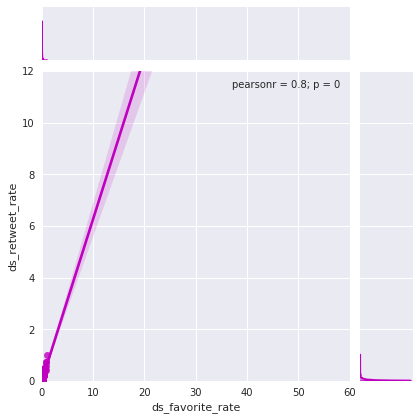

In [106]:
sns.set(style="darkgrid")
x = df_clean.ds_favorite_rate
y = df_clean.ds_retweet_rate
sns.jointplot(x, y, data = df_clean, kind="reg",xlim=(0, 60), ylim=(0, 12), color="m")

In [113]:
df_clean

,tweet_id,full_text,retweet_count,favorite_count,ds_rate,ds_dog,ds_gender,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,ds_fav_rate,ds_favorite_rate,ds_retweet_rate
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8288,37949,1.299987,None,Male,13,10,None,None,None,None,0.231574,0.231574,0.099448
1,892177421306343426,This is Tilly. She's just checking pup on you....,6121,32584,1.299987,None,Female,13,10,None,None,None,None,0.198836,0.198836,0.073446
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4054,24533,1.199988,None,Male,12,10,None,None,None,None,0.149706,0.149706,0.048644
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8426,41291,1.299987,None,Female,13,10,None,None,None,None,0.251968,0.251968,0.101104
4,891327558926688256,This is Franklin. He would like you to stop ca...,9130,39478,1.199988,None,Male,12,10,None,None,None,None,0.240905,0.240905,0.109551
5,891087950875897856,Here we have a majestic great white breaching ...,3039,19841,1.299987,None,None,13,10,None,None,None,None,0.121075,0.121075,0.036465
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,2010,11597,1.299987,None,Male,13,10,None,None,None,None,0.070768,0.070768,0.024118
7,890729181411237888,When you watch your owner call another dog a g...,18387,64022,1.299987,None,None,13,10,None,None,None,None,0.390678,0.390678,0.220626
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,4176,27248,1.299987,None,Female,13,10,None,None,None,None,0.166274,0.166274,0.050108
9,890240255349198849,This is Cassie. She is a college pup. Studying...,7190,31263,1.399986,doggo,Female,14,10,doggo,None,None,None,0.190775,0.190775,0.086273


In [110]:
sns.pairplot(data=df_clean.iloc[:,2:5], kind='reg')

array(['doggo', 'puppo', 'puppo', 'pupper', 'doggo', 'floofer', 'pupper',
       'pupper', 'pupper', 'pupper', 'pupper', 'puppo', 'pupper', 'pupper',
       'doggo', 'pupper', 'doggo', 'doggo', 'doggo', 'puppo', 'pupper',
       'pupper', 'puppo', 'doggo', 'puppo', 'pupper', 'doggo', 'doggo',
       'pupper', 'pupper', 'doggo', 'doggo', 'pupper', 'pupper', 'pupper',
       'pupper', 'doggo', 'pupper', 'doggo', 'doggo', 'pupper', 'doggo',
       'doggo', 'doggo', 'doggo', 'doggo', 'pupper', 'doggo', 'doggo',
       'doggo', 'doggo', 'pupper', 'doggo', 'doggo', 'doggo', 'doggo',
       'puppo', 'puppo', 'puppo', 'pupper', 'puppo', 'pupper', 'doggo',
       'doggo', 'doggo', 'doggo', 'puppo', 'puppo', 'doggo', 'pupper',
       'doggo', 'doggo', 'doggo', 'doggo', 'pupper', 'pupper', 'pupper',
       'pupper', 'puppo', 'pupper', 'pupper', 'doggo', 'doggo', 'doggo',
       'doggo', 'pupper', 'pupper', 'pupper', 'pupper', 'puppo', 'puppo',
       'pupper', 'doggo', 'puppo', 'doggo', 'doggo', 

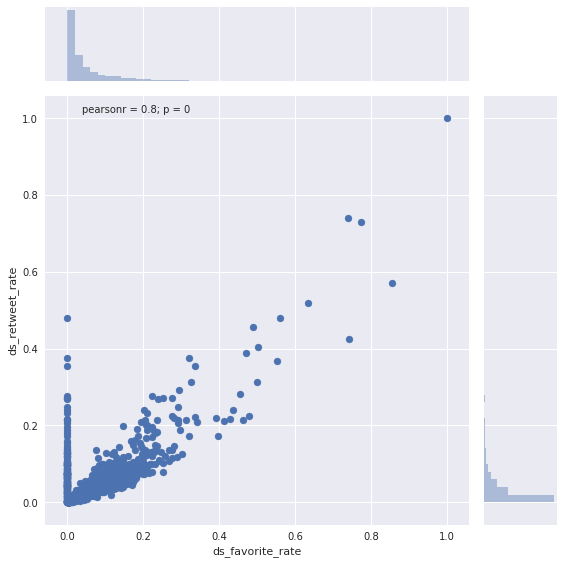

In [111]:
x = df_clean.ds_favorite_rate
y = df_clean.ds_retweet_rate
sns.jointplot(x,y,data=df_clean,size=8)

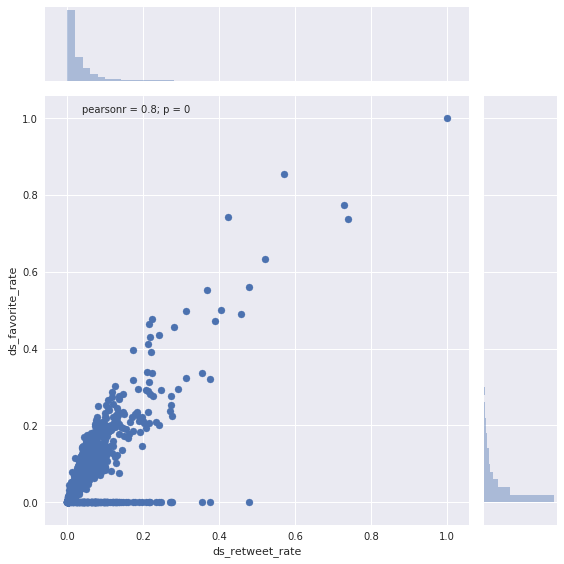

In [112]:
y = df_clean.ds_favorite_rate
x = df_clean.ds_retweet_rate
sns.jointplot(x,y,data=df_clean,size=8)

In [134]:
df_plot = df_clean[df_clean['ds_dog'] != "None"][['ds_dog','ds_gender','ds_rate','ds_favorite_rate','ds_retweet_rate']]
df_plot.head()

,ds_dog,ds_gender,ds_rate,ds_favorite_rate,ds_retweet_rate
9,doggo,Female,1.399986,0.190775,0.086273
12,puppo,Female,1.299987,0.287636,0.117435
14,puppo,Male,1.299987,0.090374,0.026314
28,pupper,None,1.199988,0.126689,0.037497
42,doggo,Male,1.199988,0.121679,0.034965


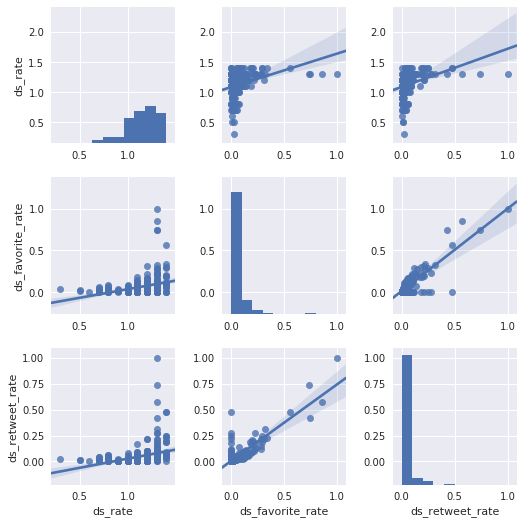

In [135]:
sns.pairplot(data=df_plot.iloc[:,2:5], kind='reg')

IndexError: list index out of range

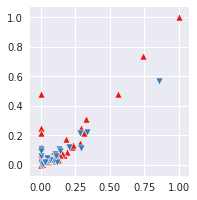

In [152]:
#x = df_plot.ds_favorite_rate
#y = df_plot.ds_retweet_rate
#df_clean[df_clean['ds_dog'] != "None"]['ds_dog'].values
#sns.FacetGrid(data=df_plot, hue = df_plot.ds_gender, size = 5)\
#    .map(plt.scatter,x,y)\
#    .add_legend()

g = sns.FacetGrid(df_plot, hue="ds_dog", palette="Set1", hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "ds_favorite_rate", "ds_retweet_rate", s=50, linewidth=.5, edgecolor="white")
g.add_legend();

In [ ]:
base_color = sns.color_palette()[0]
cat_var = ['doggo','floofer','pupper','puppo']
cat_order = df_clean[df_clean['ds_dog'] != "None"]['ds_dog'].value_counts().index
sns.countplot(data = df_clean.ds_rate, x = cat_var,color = base_color, order = cat_order )

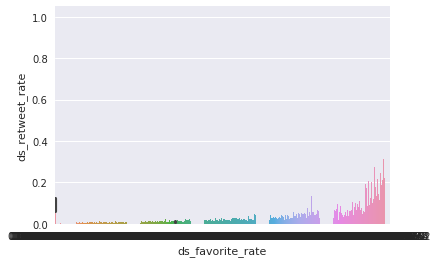

In [153]:
plt.clf()
#plt.xticks(x,)
#plt.bar(x,y)
sns.barplot(df_plot.ds_favorite_rate, df_plot.ds_retweet_rate)

In [ ]:
df_clean.retweet_count.max()

<Container object of 376 artists>

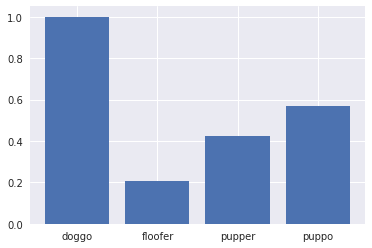

In [155]:
plt.clf()
#plt.xticks(x,)
plt.bar(df_plot.ds_dog, df_plot.ds_retweet_rate)

In [ ]:
plt.clf()
x = df_clean.retweet_count
y = df_clean.favorite_count
#plt.xticks(x,)
plt.bar(x,y)

##### 3. Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

In [ ]:
import requests
import os

imageurl = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(imageurl)

In [ ]:
folder_name = 'test'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
with open(os.path.join(folder_name,imageurl.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [ ]:
os.listdir(folder_name)

In [ ]:
df_predictions = pd.read_csv('test/image-predictions.tsv', sep='\t')
df_predictions.head()

In [ ]:
df_predictions.shape

In [ ]:
df_predictions.describe()

In [ ]:
df_predictions.p1_conf.max(), df_predictions.p2_conf.max(),df_predictions.p3_conf.max()

as p2_conf (max confidence of 48.8%) and p3_conf (max confidence of 27.3%) are very small so prediction will not be used

In [ ]:
((df_predictions.p1_conf > 0.75) & (df_predictions.p1_dog == True)).value_counts() # 75% confidence and dog is True

In [ ]:
df_predictions = df_predictions[((df_predictions.p1_conf > 0.75) & \
                                 (df_predictions.p1_dog == True))][['tweet_id','p1','p1_conf']]

In [ ]:
pred_dict = df_predictions.p1.value_counts()[:11].to_dict() # only pick the top 10 
pred_dict

In [ ]:
df_predictions.p1.value_counts()[:11].index

AS we see there were 71 different p1 values and even the top 10 will not provide meaningful data. So this will not give us a best insight to our analysis and therefore this dataset is not used. 